## VISUALIZAÇÃO DE VIBRAÇÃO

O objetivo desse notebook é visualizar:
* Anos com dados nulos
* O comportamento da tag ao longo do tempo
* Distribuição estatística e boxplot

Requisitos para rodar esse notebook:
* É necessário rodar '1_preprocessamento'/'0.1_analise_tags_recebidas'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%run ..\..\..\funcoes_base_global\funcoes_plot.py

In [2]:
input_path  = os.path.join('..','1_preprocessamento','out','')
output_path = os.path.join('out','')
if not os.path.exists(output_path): 
    os.mkdir(output_path)

In [3]:
tags_vib = {'302B':['XA3501.PV', 'XI3503.PV', 'XI3504.PV', 'XI3505.PV', 'XI3506.PV'],
        '302A':['XA3401.PV', 'XI3403.PV', 'XI3404.PV', 'XI3405.PV', 'XI3406.PV'],
        '301B':['XA3301.PV', 'XI3303.PV', 'XI3304.PV', 'XI3305.PV', 'XI3306.PV'],
        '301A':['XA3201.PV', 'XI3203.PV', 'XI3204.PV', 'XI3205.PV', 'XI3206.PV']}

In [4]:
df = pd.read_csv(input_path+'df_vibracao.csv.gz', compression = 'gzip')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,XA3401.PV,XA3401.PV_quality,XI3403.PV,XI3403.PV_quality,XI3404.PV,XI3404.PV_quality,XI3405.PV,XI3405.PV_quality,XI3406.PV,XI3406.PV_quality
Date,,,,,,,,,,
2009-01-01 00:00:00,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:01:00,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:02:00,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:03:00,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 00:04:00,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Visualização de Dados Nulos

In [6]:
# criando um dataframe novo cujo index são os anos
df_year = df[tags_vib['302A']].copy()
df_year.index = df_year.index.year

In [ ]:
plt.figure(figsize = [25,12])
sns.heatmap(df_year.isnull(), cbar = False)

### 2. Visualização Temporal

C:\Users\jessica.assumpcao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


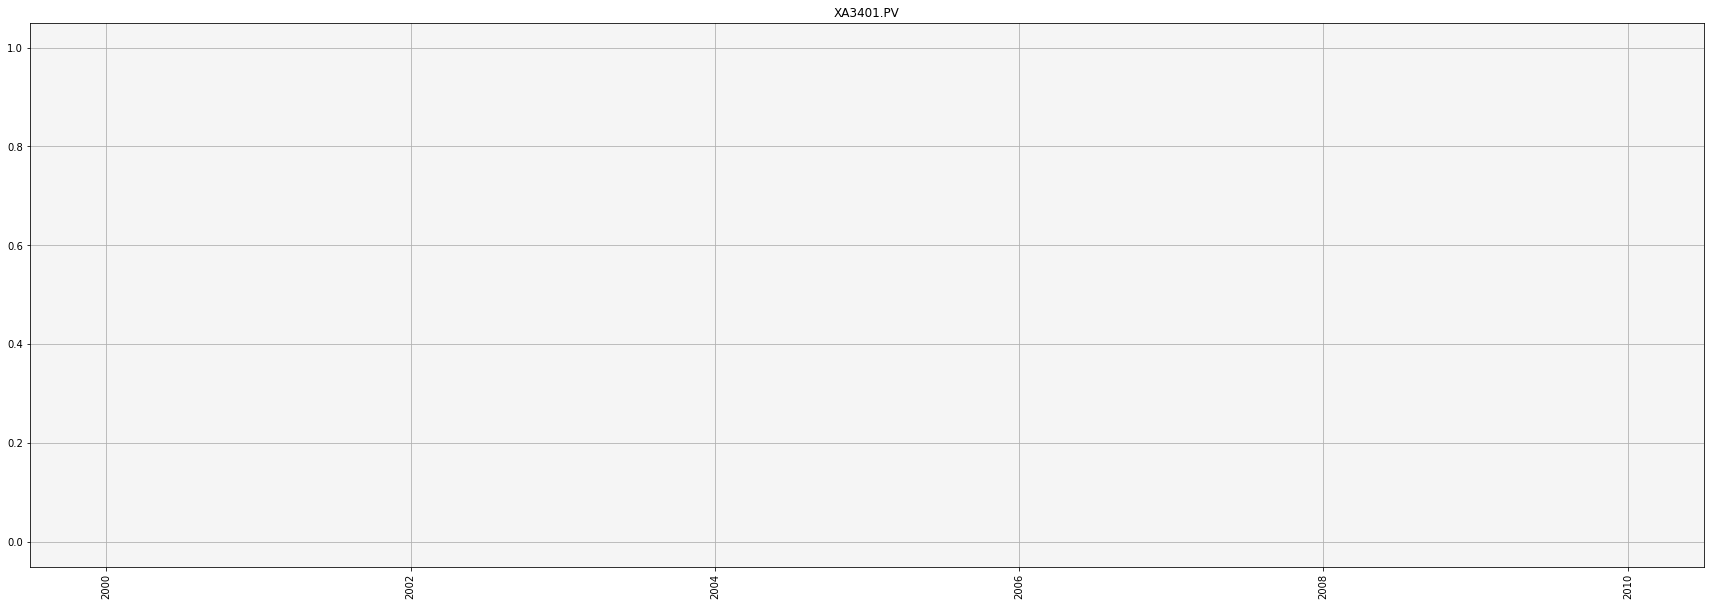

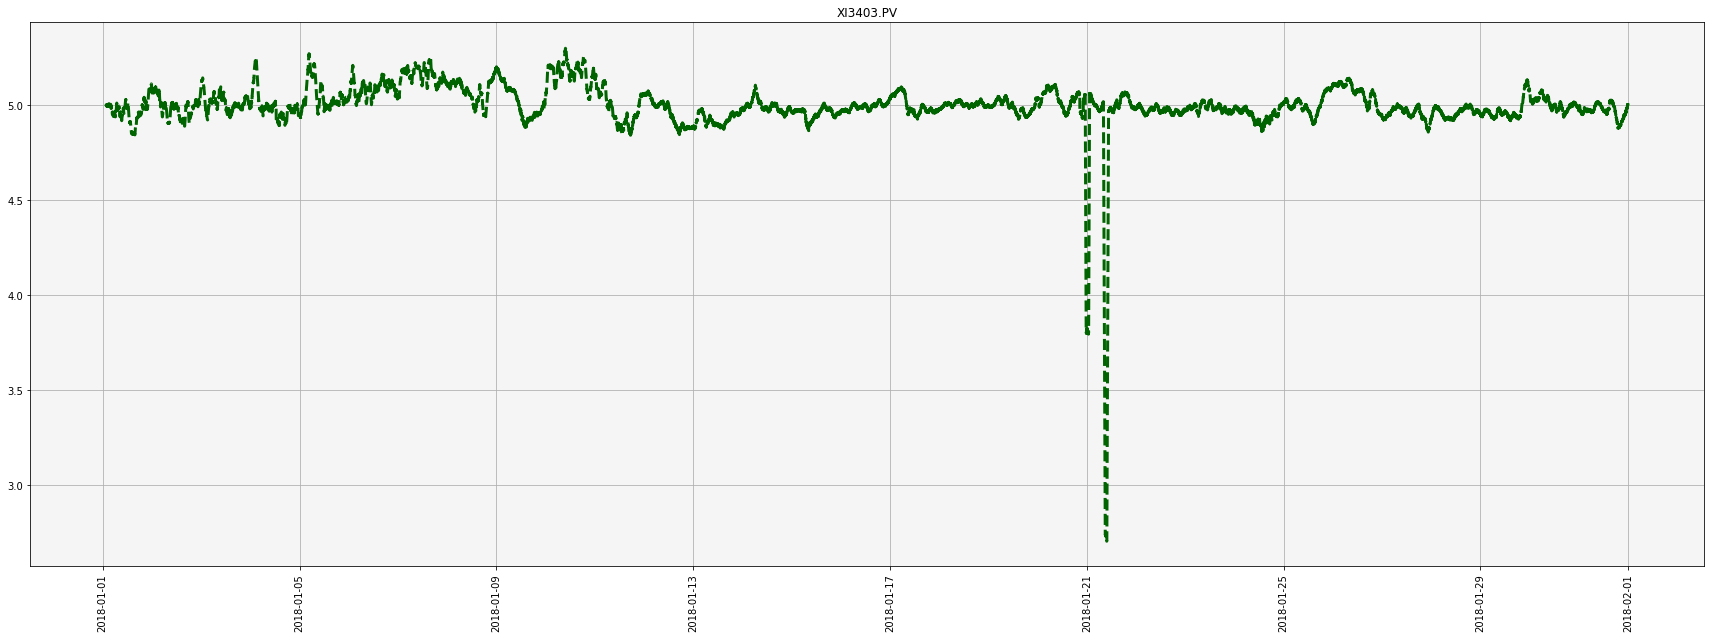

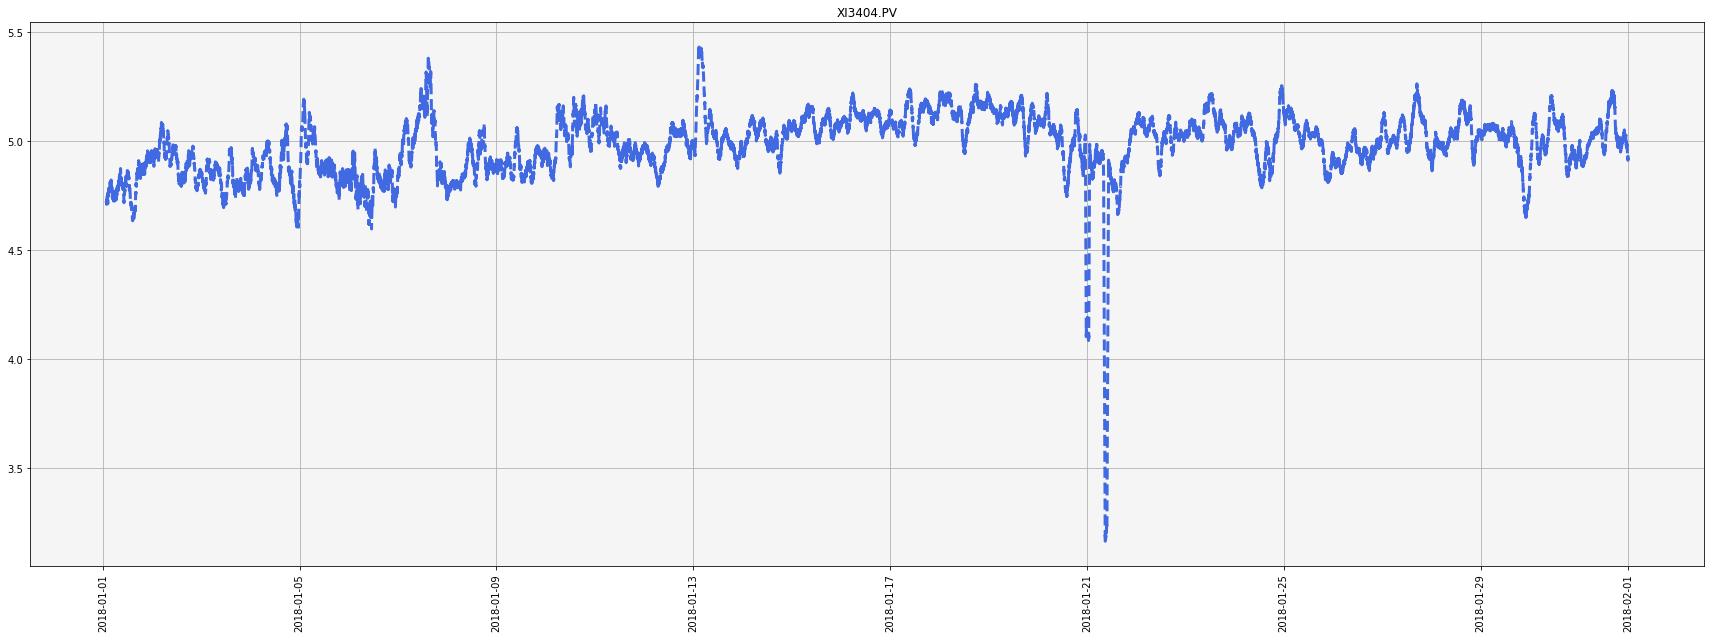

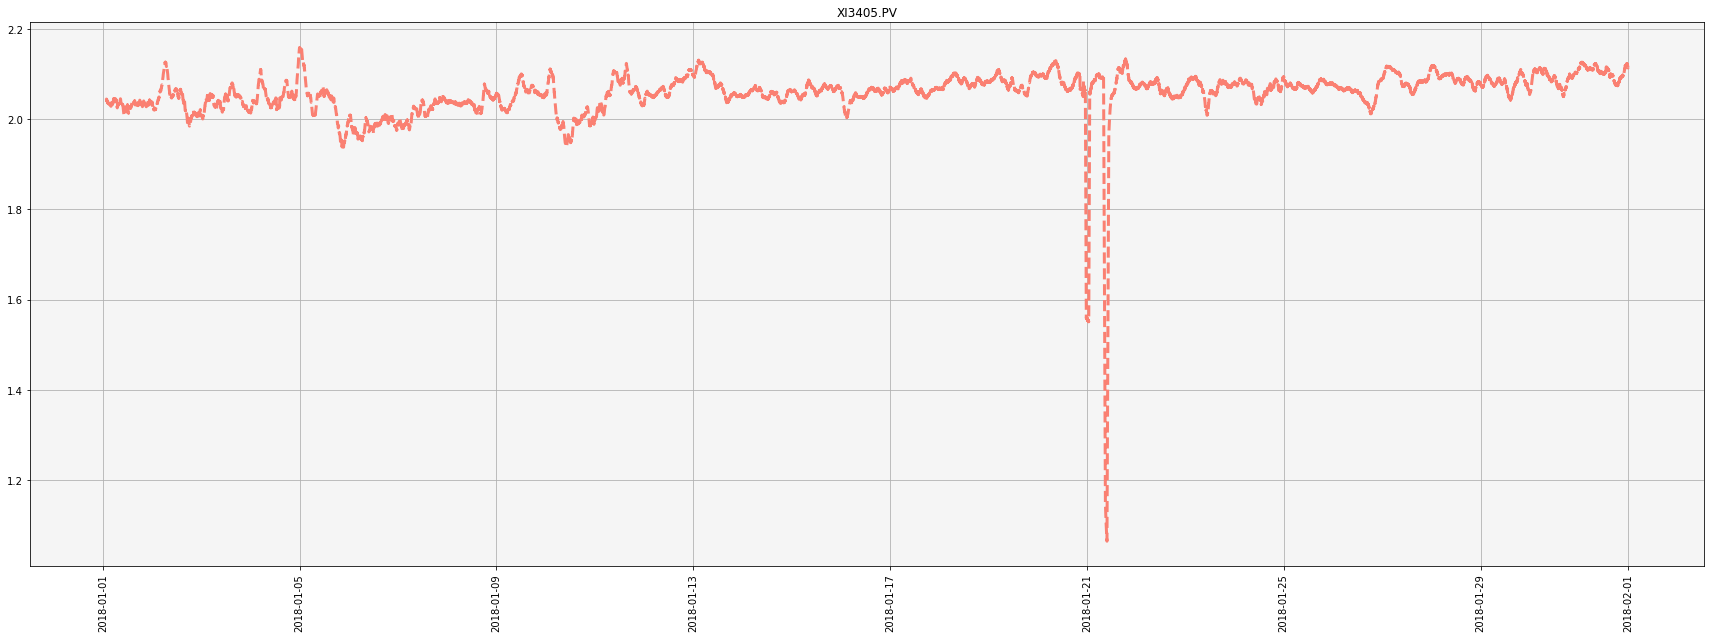

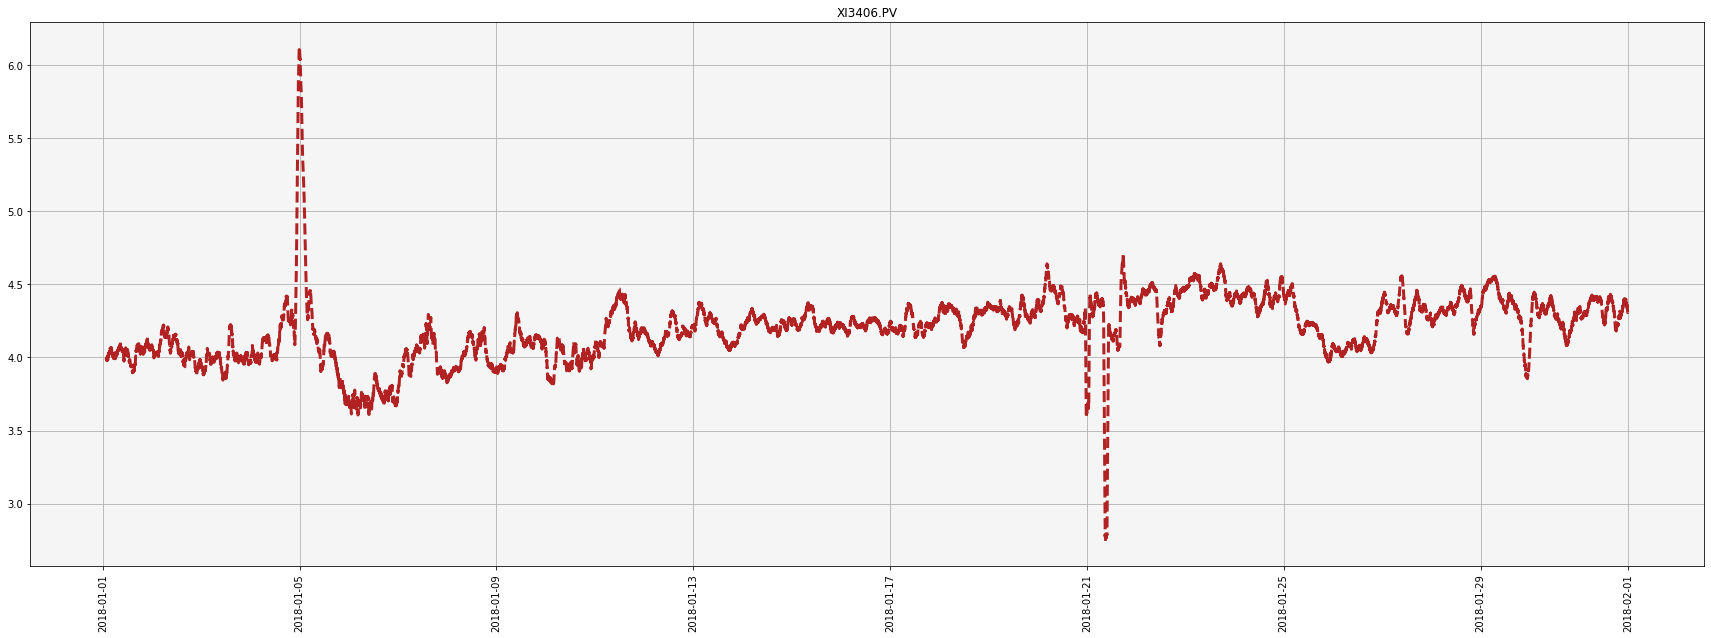

In [9]:
#Escolha das Datas de Iníco e Fim e da quantidade de pontos para a média móvel

inicio_data = '2018-01-01 00:00:00'
fim_data = '2018-02-01 00:00:00'
qtd_pontos = 100

start_date = pd.to_datetime(inicio_data,format="%Y/%m/%d %H:%M:%S")
end_date = pd.to_datetime(fim_data,format="%Y/%m/%d %H:%M:%S")

dfw_filtered = df[tags_vib['302A']][(df.index > start_date) & (df.index < end_date) ].rolling(window = qtd_pontos).mean();

colors = ['darkorange', 'darkgreen', 'royalblue', 'salmon', 'firebrick','teal','sandybrown',
          'dodgerblue', 'crimson', 'darkolivegreen', 'skyblue', 'mediumpurple','indianred', 
          'darkcyan', 'chocolate', 'cornflowerblue', 'tan', 'darkblue', 'gold', 'darkgray']
k = 0
#Plotagem da Entrada
for i in tags_vib['302A']:
    fig , ax = plt.subplots(figsize = [30, 10]);
    ax.set_facecolor(color = 'whitesmoke')
    ax.set_title(i)
    ax.plot(dfw_filtered[i], color = colors[k], lw = 3, linestyle = '--')
    ax.xaxis.set_tick_params(rotation = 90)
    ax.grid(True)
    name = i
    #plt.savefig(name+'.png', dpi = 300)
    plt.show()
    k+=1


### 3. Visualizações Estatísticas

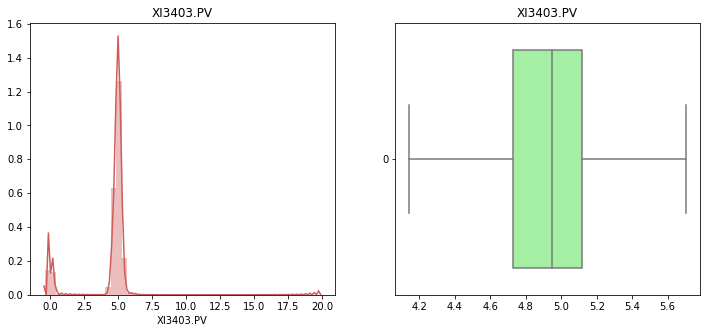

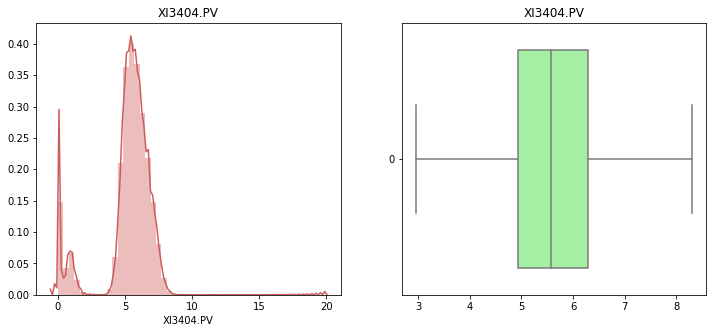

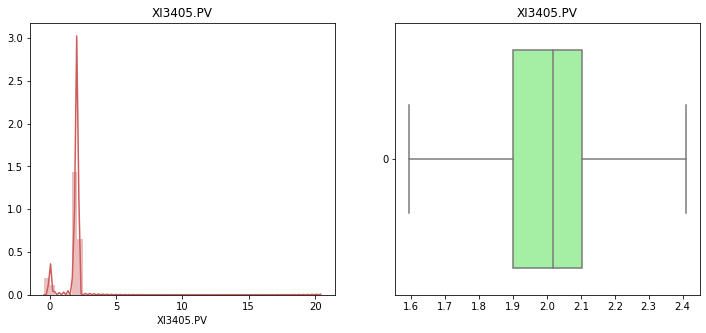

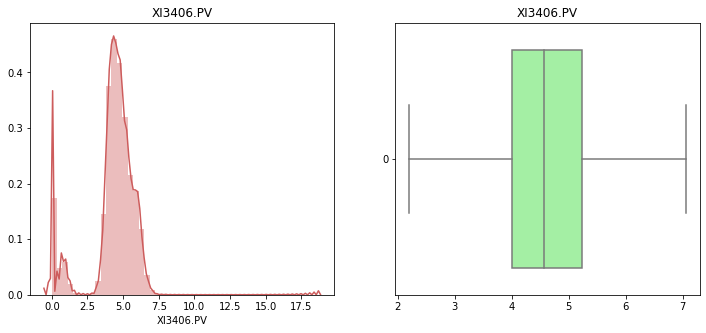

In [10]:
df_plot = df[tags_vib['302A']].dropna(axis = 1, how = 'all')

for i in df_plot.columns:
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(i)
    axes[1].set_title(i)
    sns.distplot(df_plot[i].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_plot[i].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

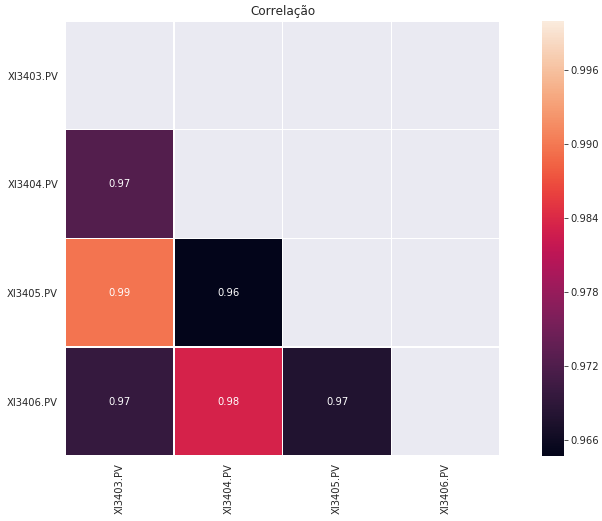

In [11]:
inicio_data = '2018-01-01 00:00:00'
fim_data = '2019-01-01 00:00:00'

#predict_1 = 'TI3409_1.PV'
#df[predict_1] = df['TI3409.PV'].shift(1000)
#df_plot = df.dropna(axis = 1, how = 'all')

start_date = pd.to_datetime(inicio_data,format="%Y/%m/%d %H:%M:%S")
end_date = pd.to_datetime(fim_data,format="%Y/%m/%d %H:%M:%S")

#tags_temp['302A'].append(predict_1)

corr = df_plot[(df_plot.index >= start_date) & (df_plot.index <= end_date)].dropna().corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style('dark'):
    plt.figure(figsize = [15, 8])
    plt.title('Correlação')
    sns.heatmap(corr, mask = mask, annot = True, square = True, linewidths = .5)
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 0) 

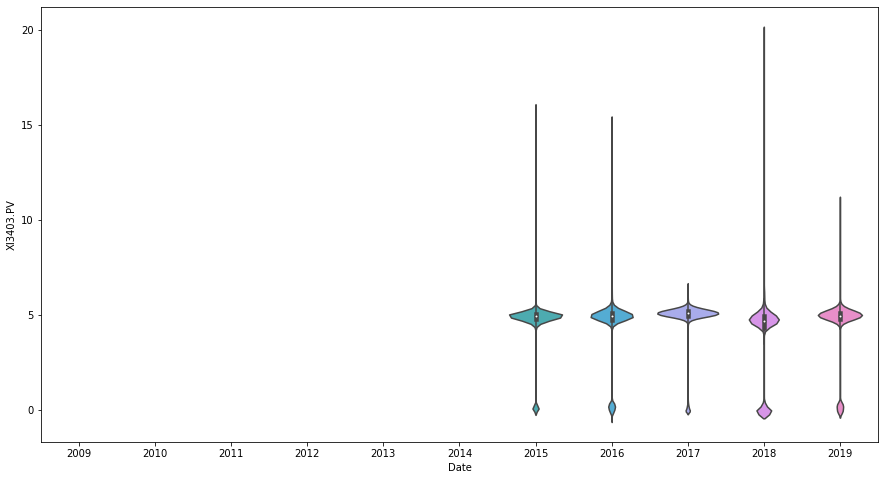

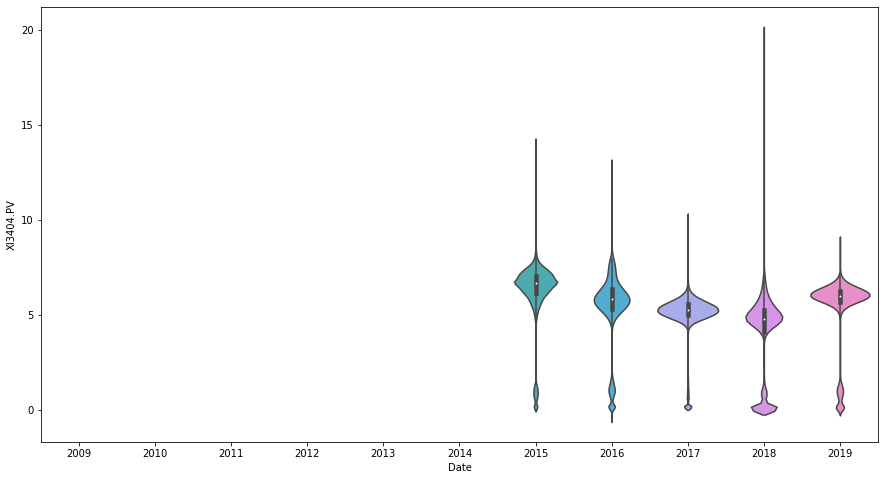

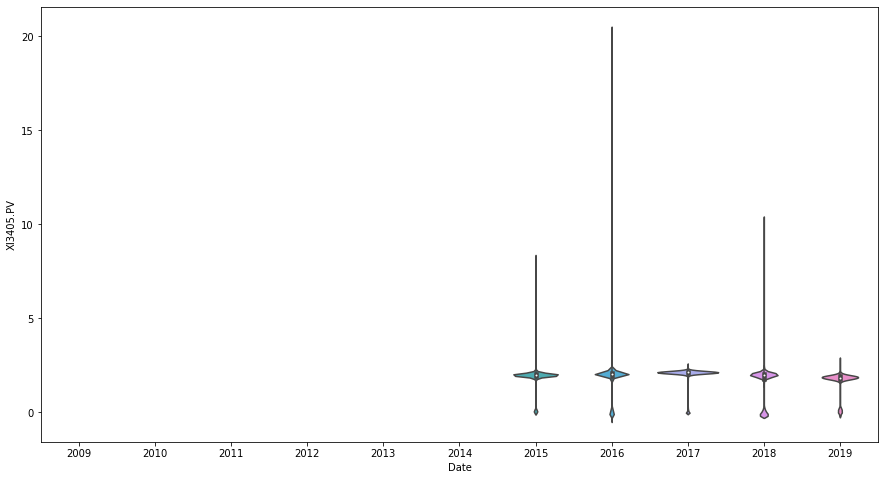

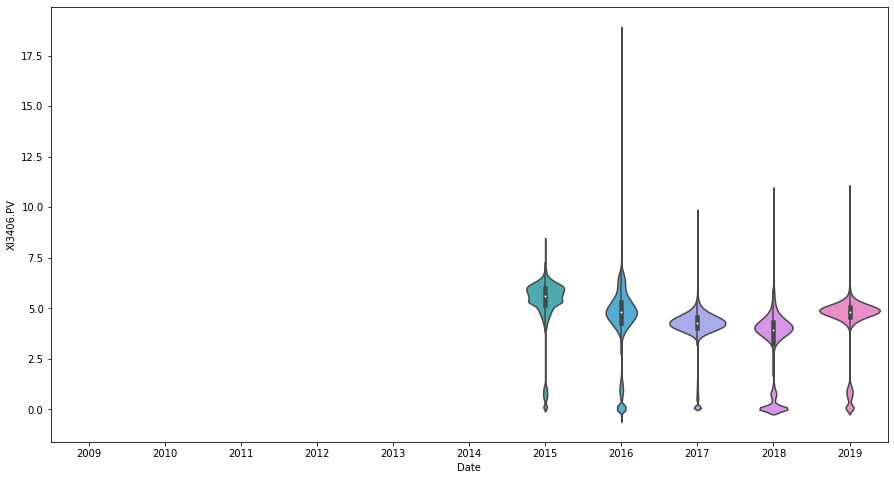

In [12]:
for i in df_plot.columns:
    plt.figure(figsize = (15, 8))
    sns.violinplot(x = df.index.year, y = i, data = df)
    name = i+' ao longo dos anos'
    #plt.savefig('./figuras/'+name+'.png', dpi = 300)
    plt.show()

###  Seleção dos Dados:
* A partir de 2015
* Não utilizar 'XA3401.PV'

###### 2.5 $\leq$ XI3403.PV $\leq$ 6
###### 2.5 $\leq$ XI3404.PV $\leq$ 10
###### 1 $\leq$ XI3405.PV $\leq$ 3
###### 2.5 $\leq$ XI3406.PV $\leq$ 7.5

In [13]:
df_use = df[tags_vib['302A']][(df.index.year >= 2015)]
df_use = df_use[(df_use['XI3403.PV'] >= 2.5) & (df_use['XI3403.PV'] <= 6)]
df_use = df_use[(df_use['XI3404.PV'] >=  2.5) & (df_use['XI3404.PV'] <= 10)]
df_use = df_use[(df_use['XI3405.PV'] >=  1) & (df_use['XI3405.PV'] <=  3)]
df_use = df_use[(df_use['XI3406.PV'] >=  2.5) & (df_use['XI3406.PV'] <=  7.5)]
df_use.drop(columns = ['XA3401.PV'], inplace = True)

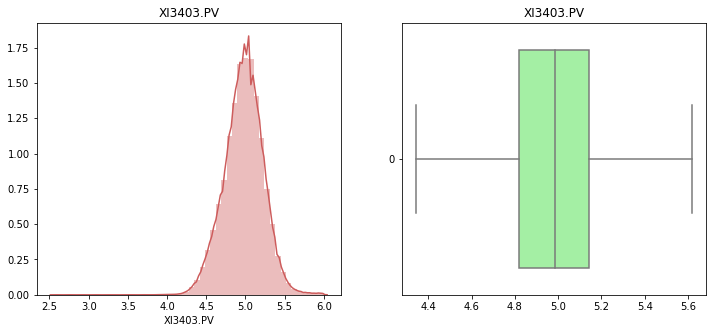

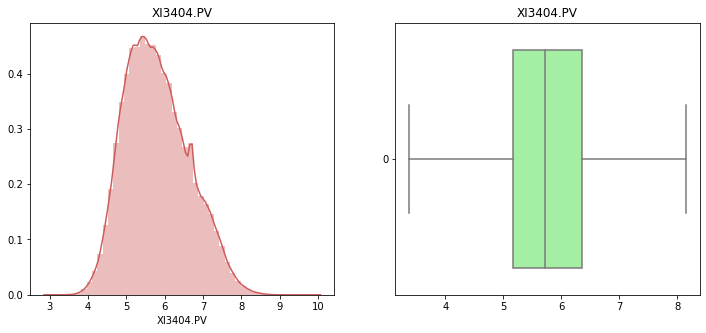

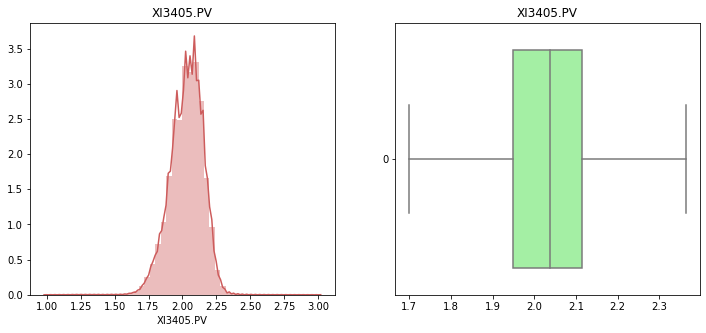

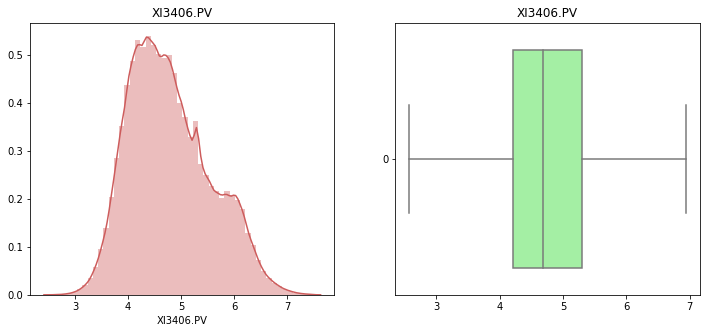

In [15]:
for i in df_use.columns:
    f, axes = plt.subplots(1, 2, figsize = [12, 5])
    axes[0].set_title(i)
    axes[1].set_title(i)
    sns.distplot(df_use[i].dropna(),ax = axes[0], color = 'indianred')
    sns.boxplot(data = df_use[i].dropna(),ax = axes[1], orient = 'h', showfliers = False, color = 'palegreen')

In [16]:
df_use.to_csv(output_path+'df_vibracao_filtrada.csv.gz', compression = 'gzip')